In [1]:
import pymysql
from sqlalchemy import create_engine
import pandas as pd
import getpass  # To get the password without showing the input
password = getpass.getpass()

········


In [2]:
connection_string = 'mysql+pymysql://root:' + password + '@localhost/bank'
engine = create_engine(connection_string)
# data = pd.read_sql_query('SELECT * FROM loan', engine)
# data.head()

In [3]:
query = '''select t.type, t.operation, t.amount as t_amount, t.balance, t.k_symbol, l.amount as l_amount, l.duration, l.payments, l.status
from trans t
left join loan l
on t.account_id = l.account_id;'''

data = pd.read_sql_query(query, engine)
data.head()

,type,operation,t_amount,balance,k_symbol,l_amount,duration,payments,status
0,PRIJEM,VKLAD,1100.0,1100.0,,96396.0,12.0,8033.0,B
1,PRIJEM,VKLAD,9900.0,11000.0,,96396.0,12.0,8033.0,B
2,PRIJEM,VKLAD,5800.0,16800.0,,96396.0,12.0,8033.0,B
3,PRIJEM,VKLAD,3300.0,20100.0,,96396.0,12.0,8033.0,B
4,VYDAJ,VYBER,16600.0,45748.0,,96396.0,12.0,8033.0,B


In [4]:
data['status'].value_counts()

C    72288
A    64599
B     9765
D     9429
Name: status, dtype: int64

In [5]:
data.shape

(868019, 9)

In [6]:
data.dtypes

type          object
operation     object
t_amount     float64
balance      float64
k_symbol      object
l_amount     float64
duration     float64
payments     float64
status        object
dtype: object

In [26]:
data.isna().sum()

type              0
operation         0
t_amount          0
balance           0
k_symbol          0
l_amount     710950
duration     710950
payments     710950
status       710950
dtype: int64

In [27]:
data = data[data['duration'].isna() == False]

In [28]:
data.isna().sum()

type         0
operation    0
t_amount     0
balance      0
k_symbol     0
l_amount     0
duration     0
payments     0
status       0
dtype: int64

In [29]:
data['duration'] = data['duration'].astype('object') # This will be treated as categorical
data.describe()

,t_amount,balance,l_amount,payments
count,147748.000000,147748.000000,147748.000000,147748.000000
mean,8022.366812,45636.834080,145810.456913,4192.544048
std,11980.002505,25065.519188,109587.181764,2197.854747
min,0.000000,-19123.600000,4980.000000,304.000000
25%,134.800000,27508.425000,64860.000000,2482.000000
50%,2700.000000,40780.200000,110736.000000,3900.000000
75%,10721.000000,59378.575000,200976.000000,5900.000000
max,87300.000000,209637.000000,590820.000000,9910.000000


In [30]:
data['duration'].value_counts()

24.0    32595
12.0    31278
60.0    29797
48.0    27330
36.0    26748
Name: duration, dtype: int64

In [31]:
data.isna().sum()

type         0
operation    0
t_amount     0
balance      0
k_symbol     0
l_amount     0
duration     0
payments     0
status       0
dtype: int64

In [32]:
data['operation'].value_counts()
def cleanOperation(x):
    x = x.lower()
    if 'vyber' in x:
        return "vyber"
    elif 'prevod' in x:
        return "prevod"
    elif 'vklad' in x:
        return 'vklad'
    else:
        return 'unknown'

In [33]:
data['operation'] = list(map(cleanOperation, data['operation']))

In [34]:
data['k_symbol'].value_counts()
data['k_symbol'].value_counts().index
def cleankSymbol(x):
    if x in ['', ' ']:
        return 'unknown'
    else:
        return x

data['k_symbol'] = list(map(cleankSymbol, data['k_symbol']))
data = data[~data['k_symbol'].isin(['POJISTINE', 'SANKC. UROK', 'UVER'])]

In [35]:
data.head()

,type,operation,t_amount,balance,k_symbol,l_amount,duration,payments,status
0,PRIJEM,vklad,1100.0,1100.0,unknown,96396.0,12,8033.0,B
1,PRIJEM,vklad,9900.0,11000.0,unknown,96396.0,12,8033.0,B
2,PRIJEM,vklad,5800.0,16800.0,unknown,96396.0,12,8033.0,B
3,PRIJEM,vklad,3300.0,20100.0,unknown,96396.0,12,8033.0,B
4,VYDAJ,vyber,16600.0,45748.0,unknown,96396.0,12,8033.0,B


In [36]:
data['type'].value_counts()

VYDAJ     83095
PRIJEM    59306
VYBER      5347
Name: type, dtype: int64

In [37]:
'PRI' in '123PRIJEM'

True

In [38]:
def clean_type(x):
    if 'PRI' in x:
        return 'PRIJEM'
    else:
        return x

In [39]:
data['type'] = list(map(clean_type, data['type']))

In [41]:
data['duration'].value_counts()

24.0    32595
12.0    31278
60.0    29797
48.0    27330
36.0    26748
Name: duration, dtype: int64

In [42]:
data.shape

(147748, 9)

In [43]:
data.head()

,type,operation,t_amount,balance,k_symbol,l_amount,duration,payments,status
0,PRIJEM,vklad,1100.0,1100.0,unknown,96396.0,12,8033.0,B
1,PRIJEM,vklad,9900.0,11000.0,unknown,96396.0,12,8033.0,B
2,PRIJEM,vklad,5800.0,16800.0,unknown,96396.0,12,8033.0,B
3,PRIJEM,vklad,3300.0,20100.0,unknown,96396.0,12,8033.0,B
4,VYDAJ,vyber,16600.0,45748.0,unknown,96396.0,12,8033.0,B


30276.0     980
174744.0    797
165960.0    755
80952.0     738
87216.0     733
39576.0     711
104712.0    711
189696.0    576
49320.0     557
91632.0     551
41904.0     540
87840.0     534
230220.0    526
45768.0     521
232560.0    512
192744.0    508
86184.0     507
265320.0    506
23052.0     503
111384.0    499
87360.0     499
71460.0     491
38148.0     487
47304.0     487
83016.0     485
93888.0     484
14628.0     480
23628.0     476
24516.0     467
141240.0    465
           ... 
22356.0      71
140880.0     71
437460.0     71
460980.0     71
334620.0     69
170832.0     69
209040.0     68
63972.0      68
172272.0     67
196224.0     67
96984.0      66
23328.0      66
58764.0      63
157068.0     63
31140.0      60
357840.0     60
249792.0     59
17952.0      58
163332.0     58
219456.0     58
210744.0     58
39168.0      57
495180.0     56
49488.0      55
160920.0     53
153936.0     48
352704.0     47
185544.0     47
22260.0      42
38496.0      39
Name: l_amount, Length: 

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

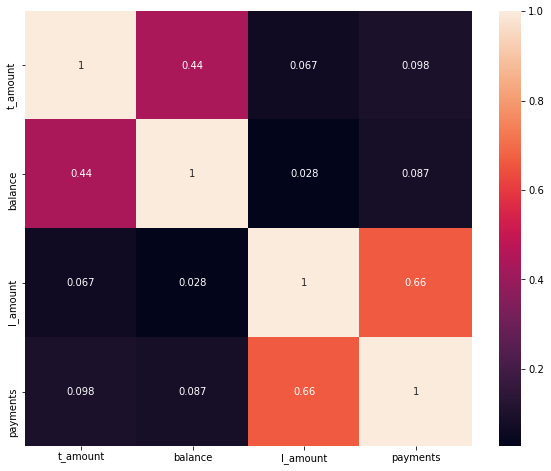

In [46]:
corr_matrix=data.corr(method='pearson')  # default
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()

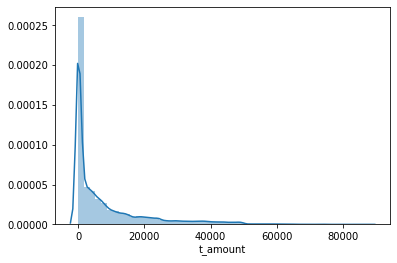

In [47]:
sns.distplot(data['t_amount'])
plt.show()


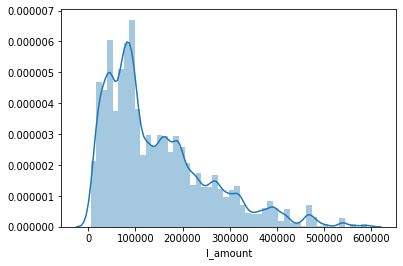

In [48]:

sns.distplot(data['l_amount'])
plt.show()



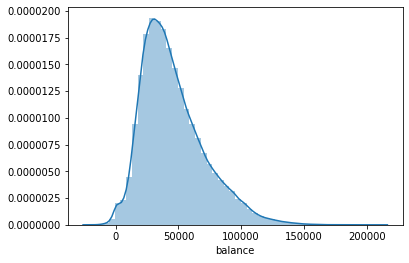

In [49]:
sns.distplot(data['balance'])
plt.show()


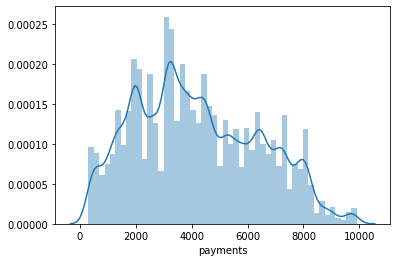

In [50]:

sns.distplot(data['payments'])
plt.show()

In [52]:
from sklearn.preprocessing import Normalizer
# from sklearn.preprocessing import StandardScaler
import numpy as np
X = data.select_dtypes(include = np.number)

# Normalizing data
transformer = Normalizer().fit(X)
x_normalized = transformer.transform(X)
x = pd.DataFrame(x_normalized)

In [54]:
cat = data.select_dtypes(include = np.object)
cat = cat.drop(['status'], axis=1)
categorical = pd.get_dummies(cat, columns=['type', 'operation', 'k_symbol', 'duration'])

In [55]:
y = data['status']
X = np.concatenate((x, categorical), axis=1)

In [56]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=100)

In [69]:
from sklearn.linear_model import LogisticRegression
classification = LogisticRegression(random_state=0, solver='lbfgs',
                  multi_class='multinomial').fit(X_train, y_train)

/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [70]:
classification.score(X_test, y_test)

0.7132825719120135

In [71]:
predictions = classification.predict(X_test)
classification.score(X_test, y_test)

0.7132825719120135

In [72]:
pd.Series(predictions).value_counts()

C    29776
A    28854
B      460
D       10
dtype: int64

In [73]:
y_test.value_counts()

C    27300
A    24782
B     3609
D     3409
Name: status, dtype: int64

In [74]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions)

array([[20067,   114,  4600,     1],
       [ 2730,   210,   666,     3],
       [ 5348,    78, 21873,     1],
       [  709,    58,  2637,     5]])

In [75]:
from sklearn import metrics
import matplotlib.pyplot as plt

y_pred_proba = classification.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr)

ValueError: multiclass format is not supported

In [76]:
classification.predict_proba(X_test)

array([[0.65510481, 0.04561391, 0.27237774, 0.02690354],
       [0.45091257, 0.06229525, 0.45009607, 0.03669611],
       [0.81433223, 0.06777564, 0.11412357, 0.00376857],
       ...,
       [0.6838987 , 0.04793901, 0.25470221, 0.01346009],
       [0.14636886, 0.02088015, 0.75673785, 0.07601315],
       [0.41402934, 0.03370498, 0.52936355, 0.02290213]])

In [78]:
classification.predict_proba(X_test)[::,0]

array([0.65510481, 0.45091257, 0.81433223, ..., 0.6838987 , 0.14636886,
       0.41402934])

In [81]:
from sklearn.preprocessing import label_binarize
y = label_binarize(y, classes=[0,1,2,3])
n_classes = 4

In [94]:
from sklearn import datasets
iris = datasets.load_iris()
X, y = iris.data, iris.target

y = label_binarize(y, classes=[0,1,2])
n_classes = 3

In [95]:
y

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0,